In [8]:
!pip install roboflow ultralytics


In [12]:
from roboflow import Roboflow
rf = Roboflow(api_key="DmdpiYQ7xK2Ir4NLTzVo")  # your key
project = rf.workspace("mllab").project("fruits-ogc66")  # project name
version = project.version(1)  # version 1
dataset = version.download("yolov8")  # format: YOLOv8


loading Roboflow workspace...
loading Roboflow project...


In [13]:
from ultralytics import YOLO

# Load YOLOv8 small model
model = YOLO("yolov8n.pt")  # 'n' = nano version (fastest for beginners)

# Train on fruit dataset
model.train(data=dataset.location + "/data.yaml", epochs=20, imgsz=416)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/fruits-1/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=416, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=1

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c4c637632c0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

In [14]:
from ultralytics import YOLO

# Load trained model
eval_model = YOLO("runs/detect/train/weights/best.pt")


Saving 6_jpg.rf.1ea1c3fd5ccb4f89a05d7573ed4747cd.jpg to 6_jpg.rf.1ea1c3fd5ccb4f89a05d7573ed4747cd.jpg
Running inference on: 6_jpg.rf.1ea1c3fd5ccb4f89a05d7573ed4747cd.jpg

image 1/1 /content/6_jpg.rf.1ea1c3fd5ccb4f89a05d7573ed4747cd.jpg: 416x416 1 banana, 9.5ms
Speed: 1.3ms preprocess, 9.5ms inference, 1.5ms postprocess per image at shape (1, 3, 416, 416)


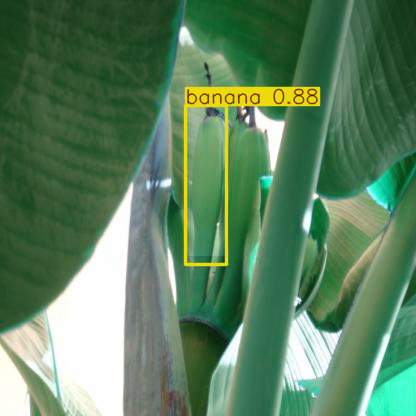

In [16]:
from google.colab import files
from PIL import Image

uploaded = files.upload()  # upload fruit image (apple, banana, etc.)

for name in uploaded.keys():
    print("Running inference on:", name)
    results = eval_model(name)
    output_image = results[0].plot()
    display(Image.fromarray(output_image))


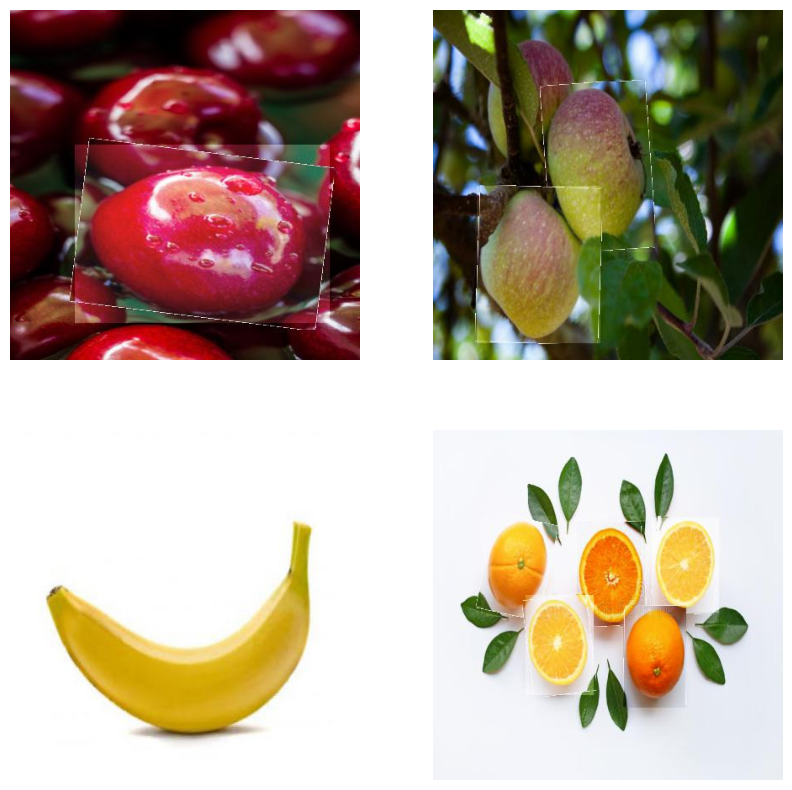

In [17]:
import glob
from PIL import Image
import matplotlib.pyplot as plt

image_paths = glob.glob(dataset.location + '/train/images/*.jpg')[:4]
plt.figure(figsize=(10,10))
for i, path in enumerate(image_paths):
    plt.subplot(2,2,i+1)
    plt.imshow(Image.open(path))
    plt.axis('off')
plt.show()


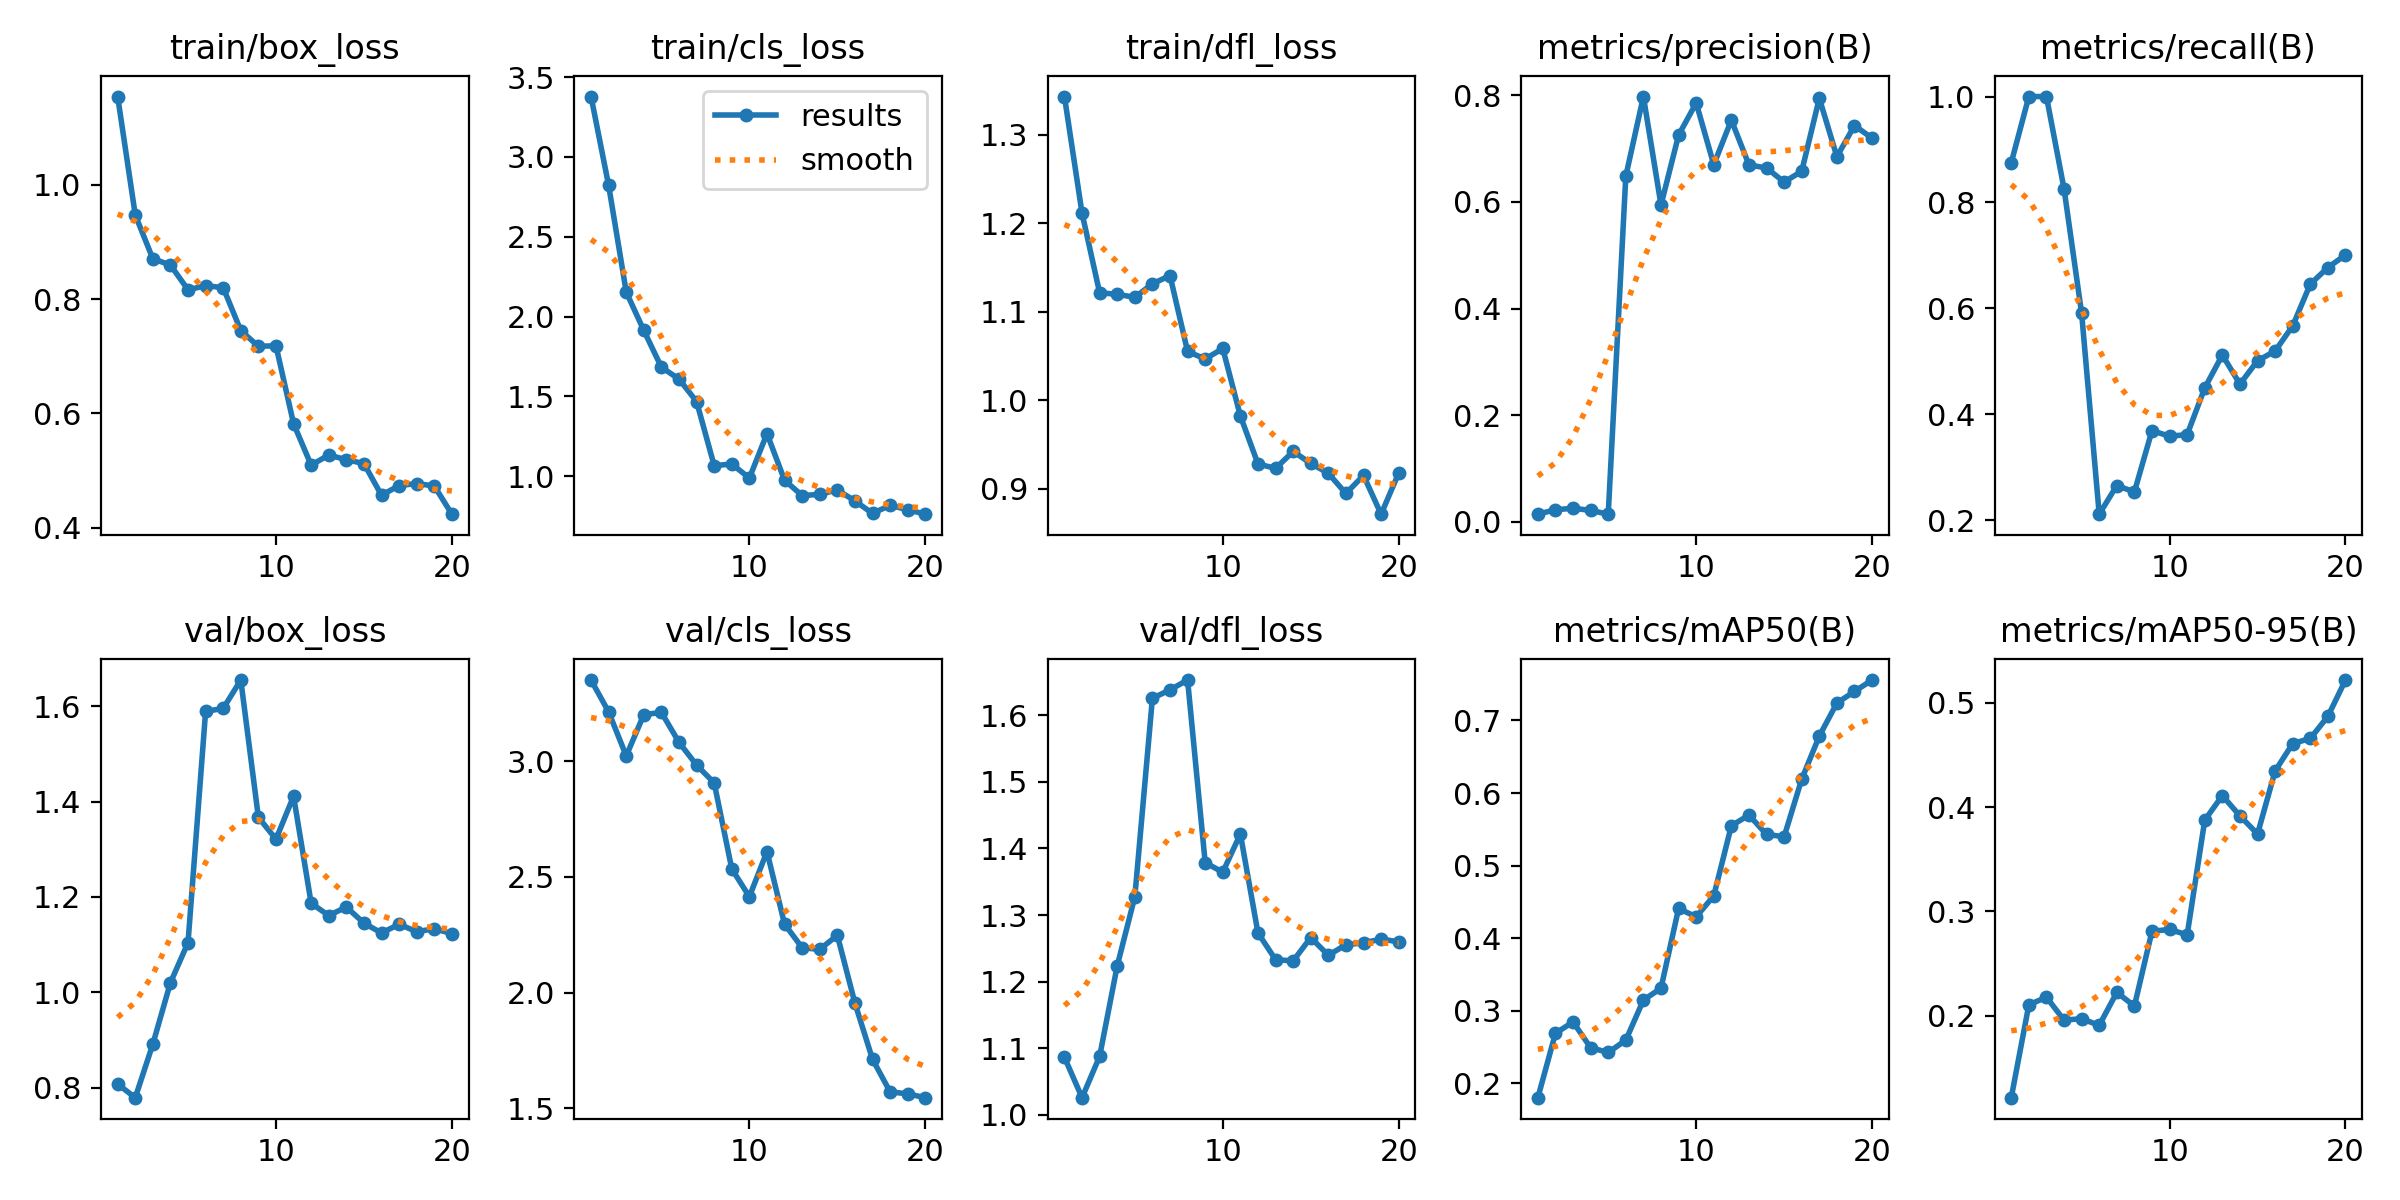

In [19]:
from IPython.display import Image
Image(filename='runs/detect/train/results.png', width=700)


In [20]:
metrics = model.val()
print(metrics)


Ultralytics 8.3.228 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 662.3±198.0 MB/s, size: 22.7 KB)
val: Scanning /content/fruits-1/valid/labels.cache... 11 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 11/11 13.9Kit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 3.9it/s 0.3s
                   all         11         37       0.72      0.701      0.755      0.523
                 apple          6         16       0.73      0.688      0.747      0.541
                orange          5         21      0.709      0.714      0.764      0.504
Speed: 0.9ms preprocess, 10.0ms inference, 0.0ms loss, 1.9ms postprocess per image
Results saved to /content/runs/detect/val
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 2])
box: ultralytic

In [21]:
model.predict(dataset.location + '/test/images', save=True)



image 1/6 /content/fruits-1/test/images/22_jpg.rf.909b4676b23712b0b45c0b13158d40a4.jpg: 416x416 2 oranges, 5.7ms
image 2/6 /content/fruits-1/test/images/4_jpg.rf.9b5c7a4c6cc46212163129d4a2caafab.jpg: 416x416 1 orange, 5.7ms
image 3/6 /content/fruits-1/test/images/7_jpg.rf.c4bfbc6c22f4985b647a6e495e660b54.jpg: 416x416 (no detections), 9.3ms
image 4/6 /content/fruits-1/test/images/9_jpg.rf.2ff7d1707e820f9292cc61f731d58ecb.jpg: 416x416 3 bananas, 9.1ms
image 5/6 /content/fruits-1/test/images/Image_44_jpg.rf.06cb704d7a68d119b48ede1b9e5152f4.jpg: 416x416 1 banana, 5.7ms
image 6/6 /content/fruits-1/test/images/Image_47_jpg.rf.a0f3ff307467d5ff20765f103d8d5059.jpg: 416x416 2 apples, 5.6ms
Speed: 1.2ms preprocess, 6.8ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Results saved to /content/runs/detect/predict


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'apple', 1: 'banana', 2: 'orange'}
 obb: None
 orig_img: array([[[ 80, 101, 162],
         [ 82, 103, 164],
         [ 83, 104, 165],
         ...,
         [ 63,  70, 113],
         [ 62,  69, 112],
         [ 61,  68, 111]],
 
        [[ 84, 105, 166],
         [ 85, 106, 167],
         [ 86, 107, 168],
         ...,
         [ 64,  71, 114],
         [ 63,  70, 113],
         [ 62,  69, 112]],
 
        [[ 88, 109, 170],
         [ 89, 110, 171],
         [ 90, 111, 172],
         ...,
         [ 63,  73, 113],
         [ 64,  72, 112],
         [ 64,  72, 112]],
 
        ...,
 
        [[167, 179, 213],
         [169, 181, 215],
         [169, 179, 213],
         ...,
         [145, 134, 160],
         [148, 135, 161],
         [162, 149, 175]],
 
        [[168, 180, 214],
         [170, 182, 216],
         [170, 180, 214],
       